In [2]:
import pandas as pd



In [8]:
# Load the Excel file
file_path = '/content/drive/MyDrive/Cattle Project (Yohan)/Cow health management/Cow health care practices/cattle_dataset.xlsx'
df = pd.read_excel(file_path)

In [9]:
df.head()

,body_temperature,breed_type,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,faecal_consistency,health_status
0,38.2,Cross Breed,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,extremely firm,unhealthy
1,38.9,Normal Breed,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,ideal,healthy
2,38.6,Cross Breed,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,ideal,healthy
3,39.5,Normal Breed,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,Black faece,unhealthy
4,39.7,Normal Breed,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,ideal,healthy


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_temperature      178 non-null    float64
 1   breed_type            178 non-null    object 
 2   milk_production       178 non-null    float64
 3   respiratory_rate      178 non-null    int64  
 4   walking_capacity      178 non-null    int64  
 5   sleeping_duration     178 non-null    float64
 6   body_condition_score  178 non-null    int64  
 7   heart_rate            178 non-null    int64  
 8   eating_duration       178 non-null    float64
 9   lying_down_duration   178 non-null    float64
 10  ruminating            178 non-null    float64
 11  rumen_fill            178 non-null    int64  
 12  faecal_consistency    178 non-null    object 
 13  health_status         178 non-null    object 
dtypes: float64(6), int64(5), object(3)
memory usage: 19.6+ KB


In [11]:
df = df.drop(columns=['faecal_consistency', 'breed_type'])

In [12]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding for 'health_status'
le_health_status = LabelEncoder()
df['health_status'] = le_health_status.fit_transform(df['health_status'])

In [14]:
df.head()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,health_status
0,38.2,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,1
1,38.9,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,0
2,38.6,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,0
3,39.5,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,1
4,39.7,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Y = df['health_status']
X = df.drop(['health_status'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


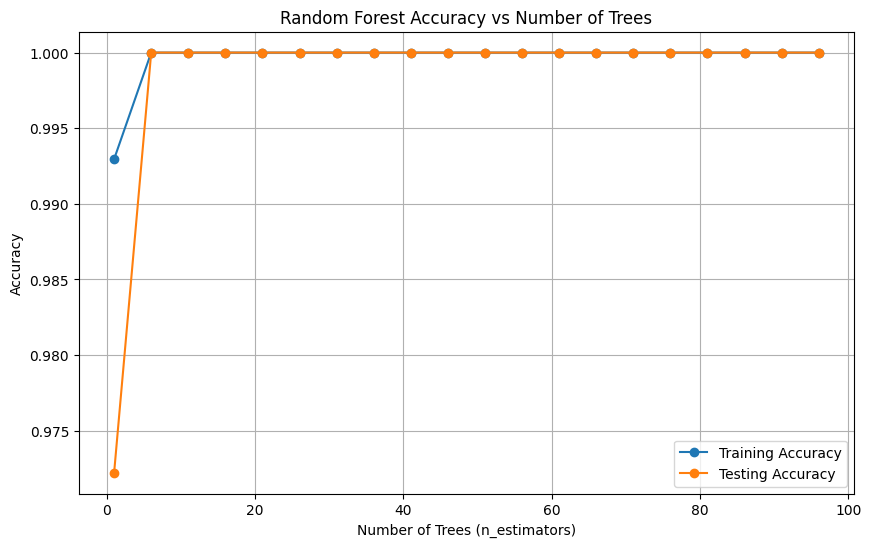

In [20]:
import matplotlib.pyplot as plt

n_estimators_range = range(1, 101, 5)
train_accuracies = []
test_accuracies = []

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, Y_train)
    Y_train_pred = rf.predict(X_train)
    train_accuracies.append(accuracy_score(Y_train, Y_train_pred))

    Y_test_pred = rf.predict(X_test)
    test_accuracies.append(accuracy_score(Y_test, Y_test_pred))


plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_estimators_range, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import numpy as np

# Assume the random forest model (rf) is already trained and the LabelEncoder (le_health_status) is fitted

def predict_health_status(body_temperature, milk_production, respiratory_rate,
                          walking_capacity, sleeping_duration, body_condition_score, heart_rate,
                          eating_duration, lying_down_duration, ruminating, rumen_fill):
    """
    Parameters:
        - body_temperature (float)
        - milk_production (float)
        - respiratory_rate (int)
        - walking_capacity (int)
        - sleeping_duration (float)
        - body_condition_score (int)
        - heart_rate (int)
        - eating_duration (float)
        - lying_down_duration (float)
        - ruminating (float)
        - rumen_fill (int)

    Returns:
        - 'Healthy' or 'Unhealthy'
    """

    input_data = {
        'body_temperature': [body_temperature],
        'milk_production': [milk_production],
        'respiratory_rate': [respiratory_rate],
        'walking_capacity': [walking_capacity],
        'sleeping_duration': [sleeping_duration],
        'body_condition_score': [body_condition_score],
        'heart_rate': [heart_rate],
        'eating_duration': [eating_duration],
        'lying_down_duration': [lying_down_duration],
        'ruminating': [ruminating],
        'rumen_fill': [rumen_fill],
    }

    input_df = pd.DataFrame(input_data)
    predicted_class = rf.predict(input_df)[0]
    health_status = le_health_status.inverse_transform([predicted_class])[0]

    return health_status

# Example
predicted_status = predict_health_status(
    body_temperature=38.5,
    # breed_type='Breed A',
    milk_production=20.0,
    respiratory_rate=30,
    walking_capacity=4,
    sleeping_duration=8.0,
    body_condition_score=3,
    heart_rate=72,
    eating_duration=5.5,
    lying_down_duration=6.0,
    ruminating=2.5,
    rumen_fill=3
)

print(f"Predicted Health Status: {predicted_status}")

Predicted Health Status: unhealthy
